In [64]:
import tensorflow
import pandas as pd
import numpy as nm

In [65]:
df = pd.read_csv('Admission_Predict.csv')
df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [66]:
df.drop(columns=['Serial No.'],inplace=True)

In [67]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [68]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [69]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [70]:
from sklearn.preprocessing import MinMaxScaler
mnsc = MinMaxScaler()

x_train_scaled = mnsc.fit_transform(x_train)
x_test_scaled = mnsc.fit_transform(x_test)

In [71]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [72]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
# model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

C:\Users\USER\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [75]:
history = model.fit(x_train_scaled,y_train,epochs=200,validation_split=0.2)

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.3454 - val_loss: 1.3148
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1939 - val_loss: 1.1666
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0628 - val_loss: 1.0265
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9324 - val_loss: 0.8980
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8109 - val_loss: 0.7772
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.6998 - val_loss: 0.6693
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6007 - val_loss: 0.5802
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5158 - val_loss: 0.5017
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4406 - val_loss: 0.4310
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3749 - val_loss: 0.3664
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3174 - val_loss: 0.3093
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2666 - val_loss: 0.2601


In [76]:
y_pred = model.predict(x_test_scaled)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [77]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.7296671723465586

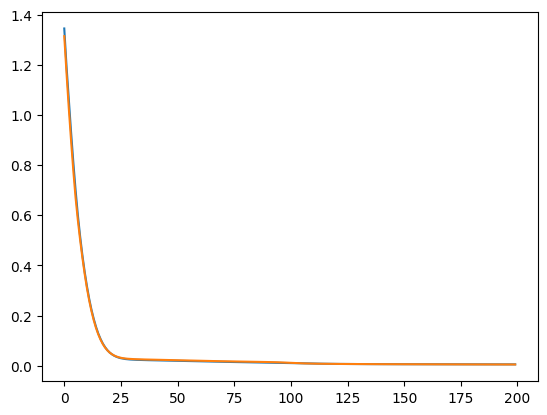

In [79]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])